## Importing library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore", category=UserWarning)

In [22]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__,sklearn.__version__

('1.26.4', '2.3.3', '0.13.2', '3.10.6', '1.7.1')

In [23]:
# Loading the Cars.csv Data sets
df= pd.read_csv('Cars.csv')

In [24]:
# Displaying first five samples
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
# Checking the shape that number of sample size and features
df.shape

(8128, 13)

In [26]:
# Checking datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [27]:
# Checking the nan values
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [28]:
 # Column owner has different categories, so before mapping, checking the categories in owner columna
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [29]:
# creating a dictionary mapping and mapping the owner column.
mapping = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner']= df['owner'].map(mapping)

In [30]:
# Verifying the owner category 
df['owner'].value_counts()

owner
1    5289
2    2105
3     555
4     174
5       5
Name: count, dtype: int64

In [31]:
# for feautre fuel, remove all rows with CNG and LPG. Before that lets check the categori in the feature fuel
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [32]:
# Selecting the rows of feature fuel that does not contain CNG and LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [33]:
# Removing the kmpl fromt the feature mileage and converting the object data types to the float.
df['mileage']= df['mileage'].str.split().str[0].astype(float)

In [34]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['engine']= df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [35]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['max_power']= df['max_power'].str.split().str[0].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [36]:
# As mentioned brand, lets change the feature name to brand
df =df.rename(columns={'name':'brand'})


In [37]:
# Taking only the first word of the brand
df['brand']=df['brand'].str.split().str[0]

In [38]:
# verifying the df
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [39]:
# Droping the feature torque because it is no longer needed 
df = df.drop(columns='torque')

In [40]:
# verifying the all torque removed or not
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [41]:
# removing Test Drive Cars from the which was mapped to 5 in the owner feature
df =df[df['owner'] !=5]

In [42]:
# verifying Onwer
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [43]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [44]:
df.to_csv('Cars_Price.csv', index=False)

In [45]:
# Another way of checking the all Column along with its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [46]:
## Univariate Analyis
num_feature = df.select_dtypes(include=['int64','float64'])
cat_feature = df.select_dtypes(exclude=['int64','float64'])

<Axes: xlabel='mileage', ylabel='Count'>

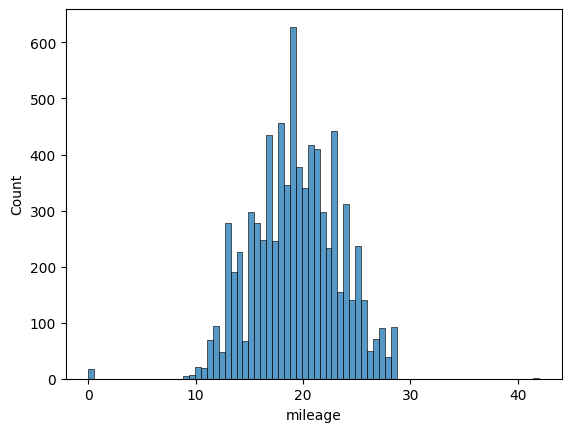

In [47]:
# Performing Univariate Analysis

sns.histplot(data= df, x= 'mileage')

<Axes: xlabel='selling_price', ylabel='Count'>

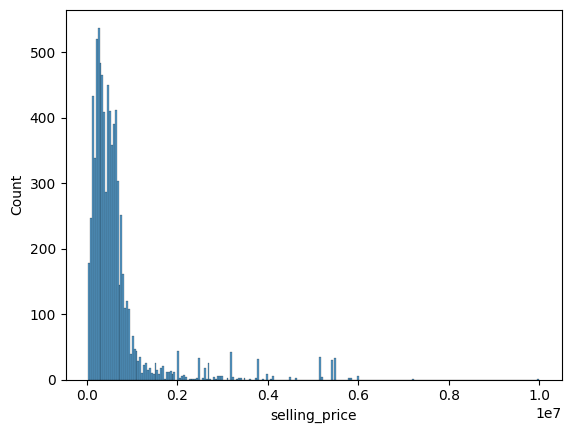

In [48]:
# Histogram of Selling Price
sns.histplot(data= df, x= 'selling_price')

<Axes: xlabel='fuel', ylabel='count'>

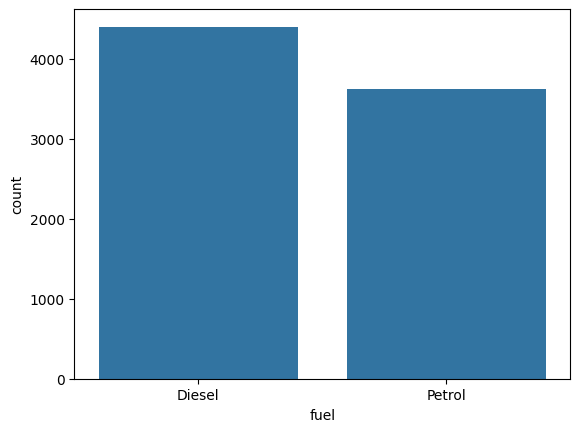

In [49]:
# Countplot of Fuel
sns.countplot(data= df, x= 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

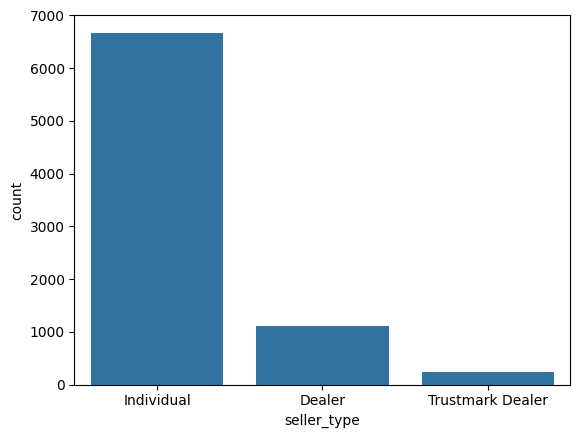

In [50]:
# graph of Selling type

sns.countplot(data= df, x= 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

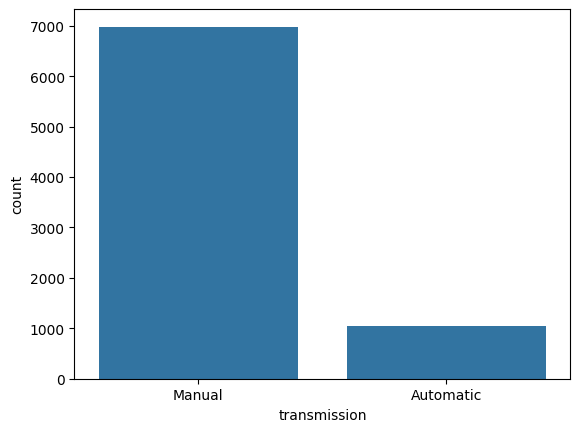

In [51]:
sns.countplot(data= df, x= 'transmission')

<Axes: xlabel='owner', ylabel='count'>

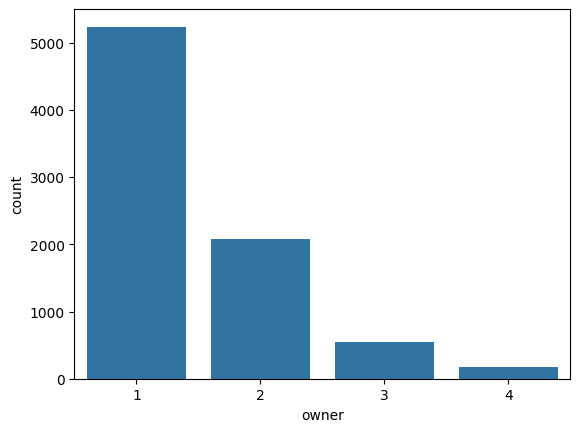

In [52]:
sns.countplot(data= df, x='owner')

<Axes: xlabel='engine', ylabel='Count'>

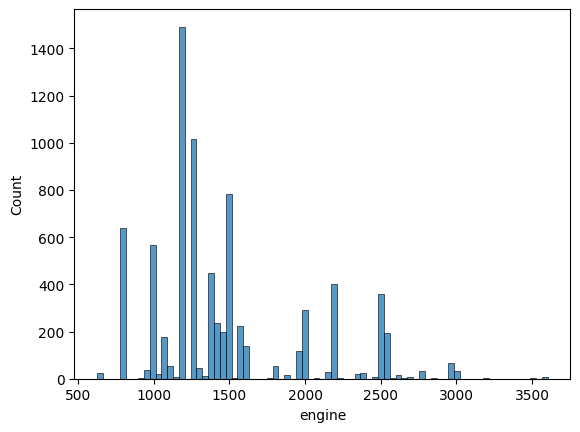

In [53]:
sns.histplot(data= df, x= 'engine')

<Axes: xlabel='max_power', ylabel='Count'>

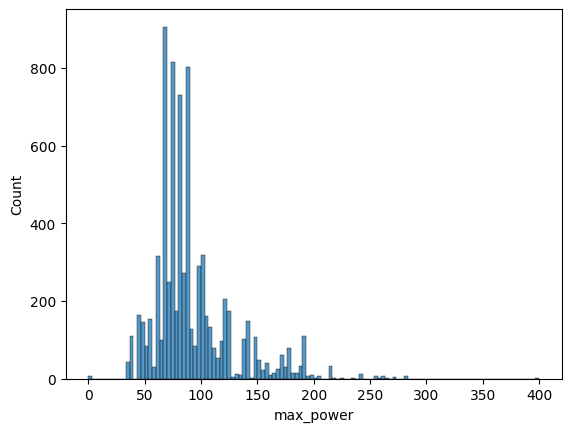

In [54]:
sns.histplot(data= df, x= 'max_power')

<Axes: xlabel='seats', ylabel='Count'>

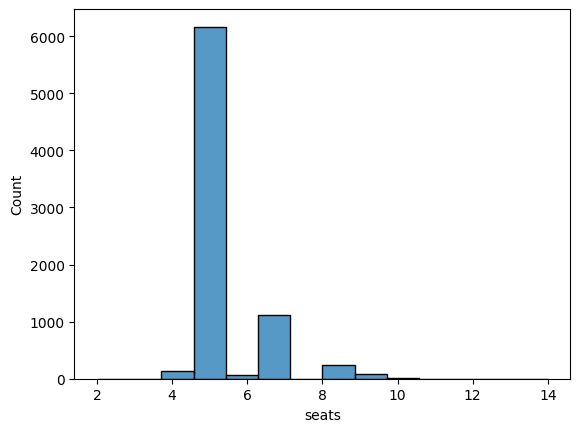

In [55]:
sns.histplot(data= df, x= 'seats')

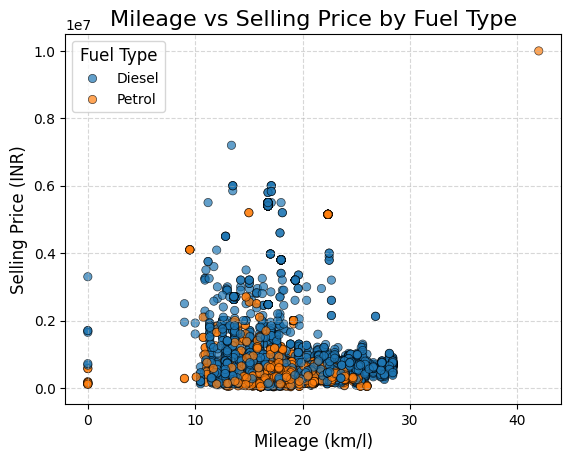

In [56]:
# sns.scatterplot(data = df,x='mileage', y= df['selling_price'], hue='fuel')
sns.scatterplot(data=df, x='mileage', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Mileage vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Mileage (km/l)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

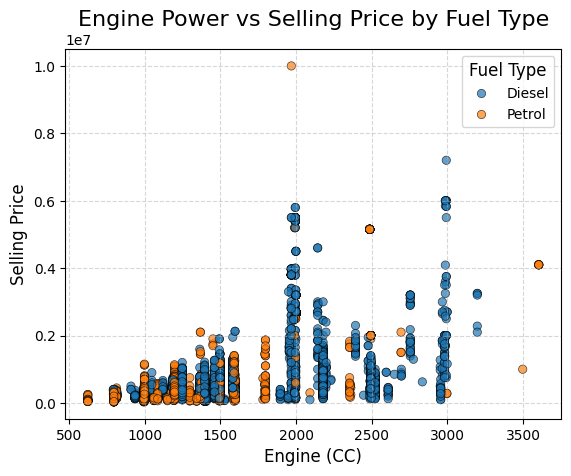

In [57]:
sns.scatterplot(data=df, x='engine', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Engine Power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Engine (CC)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

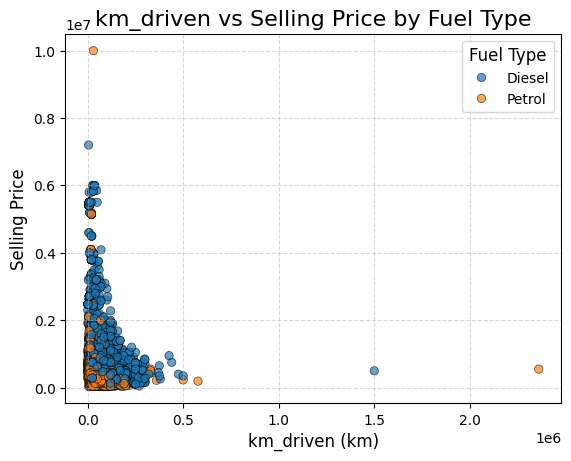

In [58]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("km_driven vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("km_driven (km)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


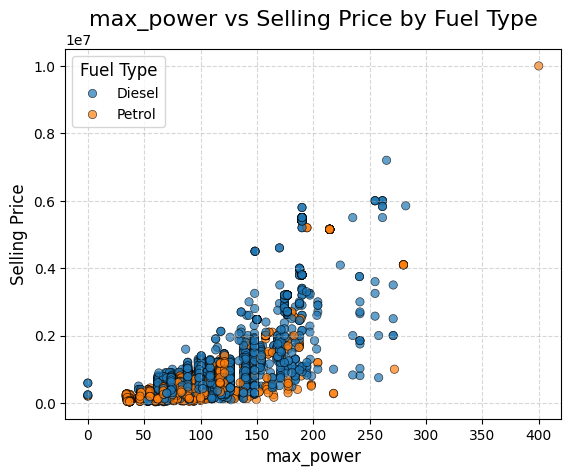

In [59]:
sns.scatterplot(data=df, x='max_power', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("max_power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("max_power", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

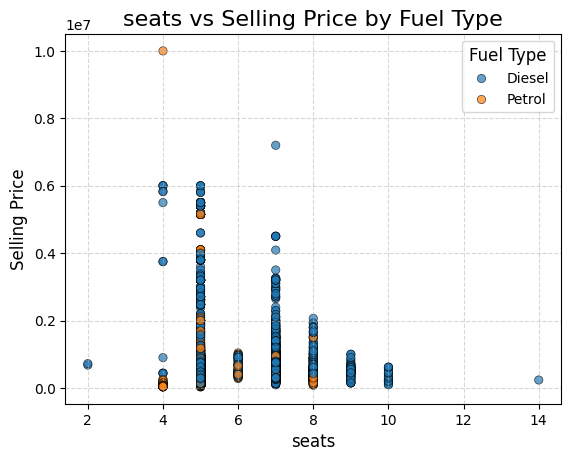

In [60]:
sns.scatterplot(data=df, x='seats', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("seats", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

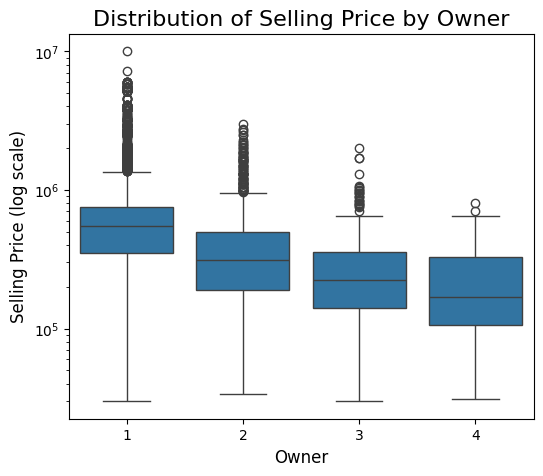

In [61]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='owner', y='selling_price')
plt.yscale('log')   
plt.title("Distribution of Selling Price by Owner", fontsize=16)
plt.xlabel("Owner", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12)
plt.show()

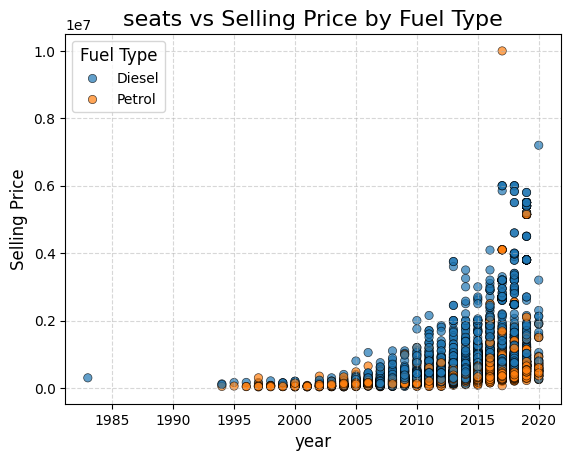

In [62]:
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', sizes=(10, 20),alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

In [63]:
# Label Encoding Because I need to show the correlation
from sklearn.preprocessing import LabelEncoder
# brand_encoder = LabelEncoder()
# df['brand'] = brand_encoder.fit_transform(df['brand'])

fuel_encoder = LabelEncoder()
df['fuel'] = fuel_encoder.fit_transform(df['fuel'])

seller_type_encoder = LabelEncoder()
df['seller_type'] = seller_type_encoder.fit_transform(df['seller_type'])

transmission_encoder = LabelEncoder()
df['transmission'] = transmission_encoder.fit_transform(df['transmission'])

In [64]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def one_hot_transform(encoder, dataframe, feature):
    # Transform (already dense because sparse_output=False)
    encoded = encoder.transform(dataframe[[feature]])
    
    # Get category names (skip first if drop='first')
    categories = encoder.categories_[0]
    if encoder.drop == 'first':
        categories = categories[1:]
    encoded_df = pd.DataFrame(encoded, columns=[f"{feature}_{cat}" for cat in categories], index=dataframe.index)
    
    # Drop original column and concatenate
    dataframe = dataframe.drop(columns=[feature])
    dataframe = pd.concat([dataframe, encoded_df], axis=1)
    return dataframe



In [65]:
# Usage
brand_ohe = OneHotEncoder(drop='first', sparse_output=False).fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')


In [66]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,1,1,1,18.50,1197.0,82.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,2007,135000,119000,0,1,1,4,16.80,1493.0,110.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,2009,382000,120000,0,1,1,1,19.30,1248.0,73.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,2013,290000,25000,0,1,1,1,23.57,1396.0,70.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
df = df.drop(['index'], axis=1, errors='ignore')


In [68]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Excluding one-hot encoded columns
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

<Axes: >

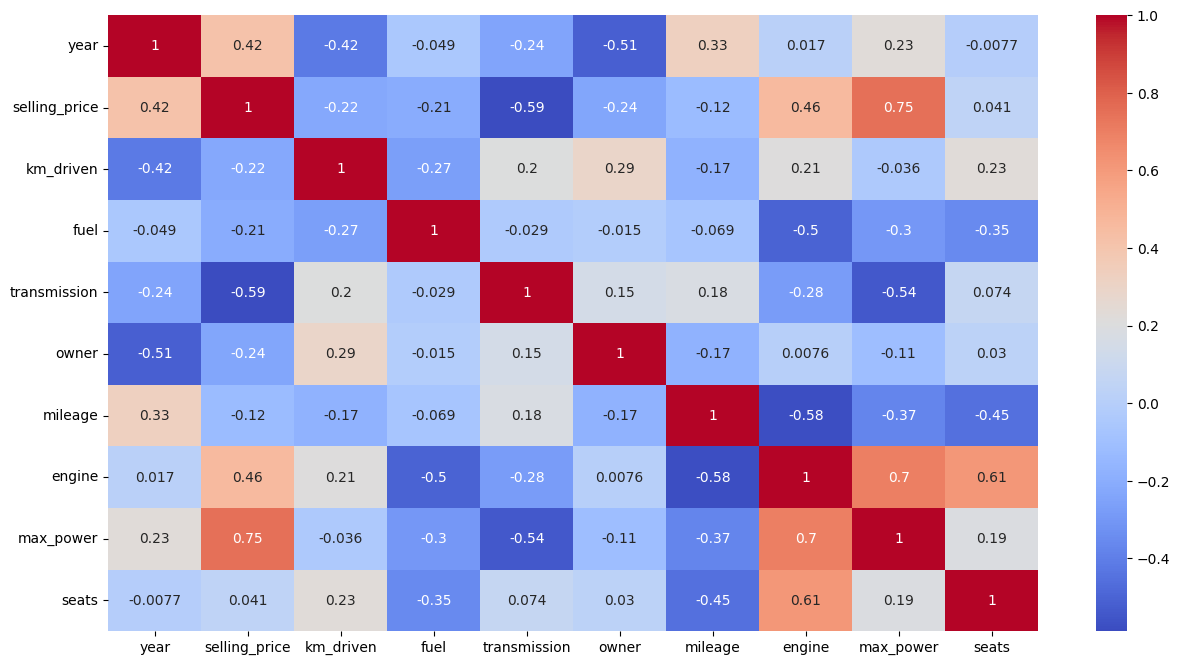

In [70]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [71]:
df['selling_price'] = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4))
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,1,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,0,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,0,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,0,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df['selling_price'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [73]:
# Get the column names after one-hot encoding
brand_cats = [f"brand_{cat}" for cat in brand_ohe.categories_[0][1:]]

# Select features
selected_cols = ['max_power', 'year', 'fuel', 'mileage'] + brand_cats
X = df[selected_cols]
y = df['selling_price']

In [74]:
k = len(set(y))
k

4

In [75]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,1,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,0,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,0,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,0,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
mileage      171
dtype: int64

In [78]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
mileage      43
dtype: int64

In [79]:
y_train.isna().sum()

0

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


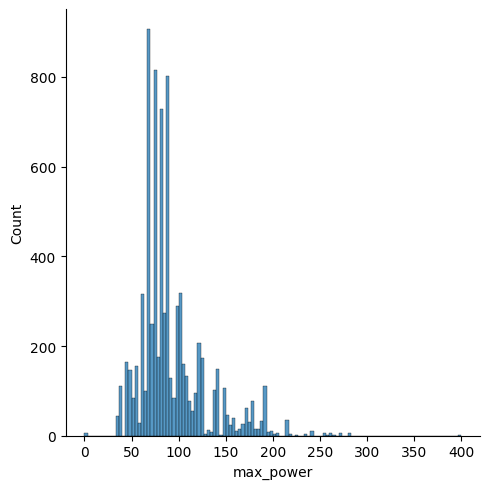

In [80]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

In [81]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\3103238701.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_9300\3103238701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


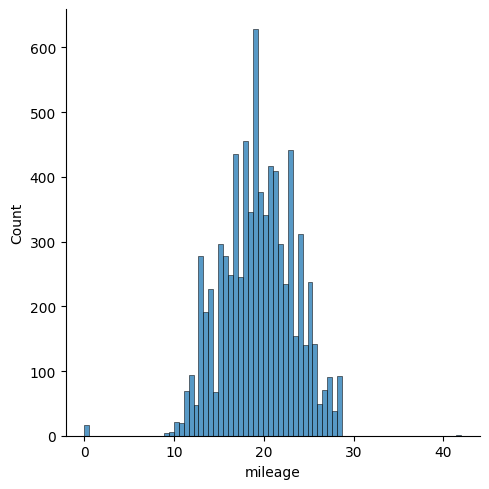

In [82]:
# Let's inspect the distribution plot, mean and median of mileage
sns.displot(data=df, x='mileage')

print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

In [83]:

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\789442960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_9300\789442960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

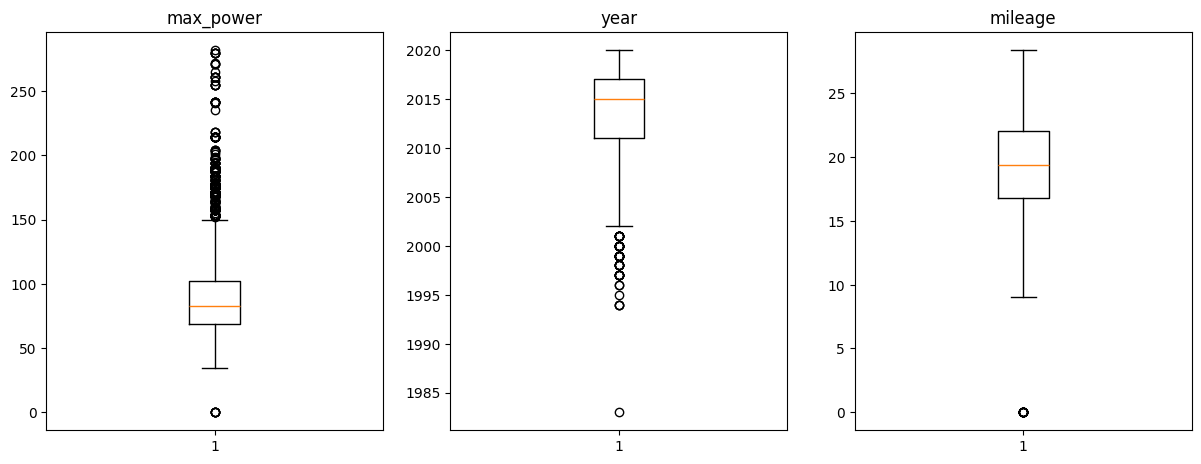

In [84]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2, 'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [85]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [86]:
for col in X_train[['max_power', 'year','mileage']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


In [87]:
from sklearn.preprocessing import StandardScaler

# Define a list of numerical feature names that need to be scaled
num_cols = ['max_power', 'year', 'mileage']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [88]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [89]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [90]:
# Let's check shapes of all X_train, X_test, Y_train_encoded, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


In [91]:
import time
from sklearn.metrics import classification_report
import mlflow


In [92]:

import mlflow
import os

mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])
mlflow.set_experiment("st125989-a3")


<Experiment: artifact_location='mlflow-artifacts:/390424609280797293', creation_time=1759564219197, experiment_id='390424609280797293', last_update_time=1759564219197, lifecycle_stage='active', name='st125989-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [93]:
class LogisticRegression:
    

    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None  # Will be initialized later
        self.losses = []

    def fit(self, X, Y):
        """
        Fit the logistic regression model to the training data.

        Args:
            X (numpy.ndarray): Training data features.
            Y (numpy.ndarray): Training data labels.

        Returns:
            None
        """
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])  # With replacement
                batch_X = X[ix:ix + batch_size]
                batch_Y = Y[ix:ix + batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        """
        Compute the gradient and loss for the logistic regression model.

        Args:
            X (numpy.ndarray): Input data features.
            Y (numpy.ndarray): Input data labels.

        Returns:
            float: Loss.
            numpy.ndarray: Gradient.
        """
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        """
        Compute the softmax probabilities.

        Args:
            theta_t_x (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Softmax probabilities.
        """
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        """
        Compute the gradient for softmax regression.

        Args:
            X (numpy.ndarray): Input data features.
            error (numpy.ndarray): Error.

        Returns:
            numpy.ndarray: Gradient.
        """
        return X.T @ error

    def h_theta(self, X, W):
        """
        Compute the predicted probabilities.

        Args:
            X (numpy.ndarray): Input data features.
            W (numpy.ndarray): Model weights.

        Returns:
            numpy.ndarray: Predicted probabilities.
        """
        return self.softmax(X @ W)

    def predict(self, X_test):
        """
        Predict class labels for input data.

        Args:
            X_test (numpy.ndarray): Input data for prediction.

        Returns:
            numpy.ndarray: Predicted class labels.
        """
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def plot(self):
        """
        Plot the training losses.

        Returns:
            None
        """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        """
        Compute classification accuracy.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Accuracy.
        """
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        """
        Compute precision for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Precision.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):
        """
        Compute recall for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Recall.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):
        """
        Compute F1-score for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: F1-score.
        """
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):
        """
        Compute macro-averaged precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged precision.
        """
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):
        """
        Compute macro-averaged recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged recall.
        """
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):
        """
        Compute macro-averaged F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged F1-score.
        """
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
        """
        Compute weighted precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted precision.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):
        """
        Compute weighted recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted recall.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):
        """
        Compute weighted F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted F1-score.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):
        """
        Generate a classification report.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            pandas.DataFrame: Classification report.
        """
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

In [94]:
class RidgePenalty:
    """Ridge penalty (L2 regularization) for logistic regression.

    Args:
        l (float): Regularization strength.
    """

    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        """Compute the Ridge penalty term.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            float: Ridge penalty term.
        """
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        """Compute the derivative of the Ridge penalty.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            numpy.ndarray: Derivative of the Ridge penalty.
        """
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    """Logistic Regression with Ridge (L2) regularization.

    Args:
        l (float): Regularization strength.
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    """Logistic Regression without regularization.

    Args:
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

In [95]:

import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Performing experiment

In [76]:


regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.347681313049646
Loss at iteration 500 5.407080485417479
Loss at iteration 1000 5.385093341855338
Loss at iteration 1500 5.37263971037543
Loss at iteration 2000 5.366223300749941
Loss at iteration 2500 5.370782101288174
Loss at iteration 3000 5.369005750447173
Loss at iteration 3500 5.366521944909621
Loss at iteration 4000 5.364974664074975
Loss at iteration 4500 5.363816680972617
Loss at iteration 5000 5.363008056149826
Loss at iteration 5500 5.361716734054611
Loss at iteration 6000 5.359662558885583
Loss at iteration 6500 5.357629751591603
Loss at iteration 7000 5.356672435220649
Loss at iteration 7500 5.356209138119648
Loss at iteration 8000 5.355943877429627
Loss at iteration 8500 5.35577145265475
Loss at iteration 9000 5.355649932817814
Loss at iteration 9500 5.355559687132883
time taken: 30.730069160461426


2025/10/05 11:31:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 4.545271028432347


2025/10/05 11:32:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/e5d12c1edc7445ac8c398a2126323bbf
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal batch
alpha: 0.001
Loss at iteration 0 1.6440619956086817
Loss at iteration 500 0.6030661148845824
Loss at iteration 1000 0.6014290125296186
Loss at iteration 1500 0.6007364539464388
Loss at iteration 2000 0.600305859835005
Loss at iteration 2500 0.6000016280006261
Loss at iteration 3000 0.5997685168225186
Loss at iteration 3500 0.599579460364615
Loss at iteration 4000 0.5994201748850287
Loss at iteration 4500 0.5992826896366183
Loss at iteration 5000 0.59916227519474
Loss at iteration 5500 0.5990560014141523
Loss at iteration 6000 0.5989621140728908
Loss at iteration 6500 0.598879694542047
Loss at iteration 7000 0.598808286941627
Loss at iteration 7500 0.5987474595889137
Loss at iteration 8000 0.5986964780757053
Loss at iteration 85

2025/10/05 11:32:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.598567086086188


2025/10/05 11:32:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/9c844af311314793996db605b48e7e67
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal batch
alpha: 0.0001
Loss at iteration 0 1.5646944873601205
Loss at iteration 500 0.6506050792614902
Loss at iteration 1000 0.6237949480626912
Loss at iteration 1500 0.6139297235817938
Loss at iteration 2000 0.6092747175000192
Loss at iteration 2500 0.606767015911809
Loss at iteration 3000 0.6052844237122229
Loss at iteration 3500 0.6043393709317292
Loss at iteration 4000 0.6036963541658281
Loss at iteration 4500 0.6032328952563074
Loss at iteration 5000 0.6028816060421218
Loss at iteration 5500 0.602603654237873
Loss at iteration 6000 0.6023757403503348
Loss at iteration 6500 0.6021833580026577
Loss at iteration 7000 0.6020171549885662
Loss at iteration 7500 0.6018708976492129
Loss at iteration 8000 0.6017402963852709
Loss at iterat

2025/10/05 11:33:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6013246173896466


2025/10/05 11:33:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/b8bdef1a1398486daf6240da8c28a678
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Normal-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/9c282dad3ae146888d8d04b87704560b
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal minibatch
alpha: 0.01
Loss at iteration 0 1.7510450843662595
Loss at iteration 500 1.376305937921975
Loss at iteration 1000 0.8933423934621934
Loss at iteration 1500 0.8257796768193871
Loss at iteration 2000 1.5114436453394178
Loss at iteration 2500 1.6049037591091775
Loss at iteration 3000 1.4874744455908235
Loss at iteration 3500 1.470128497336769
Loss at iteration 4000 0.6511067423830862
Loss at iteration 4500 1.418966500614777
Loss at iteration 5000 0.8449173094192768
Loss at iteration 5500 1.

2025/10/05 11:34:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6951944173186922


2025/10/05 11:34:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/95cb14ca479649beadd0629c1cf82a83
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal minibatch
alpha: 0.001
Loss at iteration 0 1.5120011451122857
Loss at iteration 500 0.6267591338098593
Loss at iteration 1000 0.5970193750515012
Loss at iteration 1500 0.6055425341939572
Loss at iteration 2000 0.6039678889738228
Loss at iteration 2500 0.5966506741809166
Loss at iteration 3000 0.5938816694254426
Loss at iteration 3500 0.5924715248712716
Loss at iteration 4000 0.611332391675921
Loss at iteration 4500 0.6044935427522108
Loss at iteration 5000 0.6167871814225986
Loss at iteration 5500 0.6129152562098076
Loss at iteration 6000 0.6286204564765786
Loss at iteration 6500 0.5963598774834064
Loss at iteration 7000 0.5946039044514878
Loss at iteration 7500 0.6105522091975173
Loss at iteration 8000 0.5866741276782635
Loss at

2025/10/05 11:34:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.5958021321194018


2025/10/05 11:34:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/e64eab34af674bffafaf7abeea57e50c
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal minibatch
alpha: 0.0001
Loss at iteration 0 1.7218607671696384
Loss at iteration 500 0.7562972171453031
Loss at iteration 1000 0.6788360005724949
Loss at iteration 1500 0.6564914492991881
Loss at iteration 2000 0.6491934591474057
Loss at iteration 2500 0.6455109897022259
Loss at iteration 3000 0.6335982469811207
Loss at iteration 3500 0.6165724127572149
Loss at iteration 4000 0.6135162586169001
Loss at iteration 4500 0.6046327238711923
Loss at iteration 5000 0.6250498015996344
Loss at iteration 5500 0.6063384323116497
Loss at iteration 6000 0.6225774141251722
Loss at iteration 6500 0.6362909594798793
Loss at iteration 7000 0.6136746073419206
Loss at iteration 7500 0.598245416658935
Loss at iteration 8000 0.5976911319156929
Loss 

2025/10/05 11:35:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6286992271321349


2025/10/05 11:35:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/c41a40bf63cd4647a69b5acfb8006c4e
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Normal-method-minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/27c2800f7e8c45c48c3bdc449c6b7dcd
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal sto
alpha: 0.01
Loss at iteration 0 1.2318081161396426
Loss at iteration 500 1.059191397670899
Loss at iteration 1000 0.6609895776999432
Loss at iteration 1500 1.1061987129163722
Loss at iteration 2000 1.379073261767574
Loss at iteration 2500 0.5923629392994053
Loss at iteration 3000 0.0360589403853645
Loss at iteration 3500 0.0861790096927121
Loss at iteration 4000 1.7528333719132232
Loss at iteration 4500 1.27220598955431
Loss at iteration 5000 0.7895557829524922
Loss at iteration 5500 1

2025/10/05 11:35:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.8522964513752189


2025/10/05 11:35:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/18c46a30f9ab406f9d4bc8b60b23c9c0
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal sto
alpha: 0.001
Loss at iteration 0 1.631892325483404
Loss at iteration 500 0.9395202706404255
Loss at iteration 1000 2.3429845070891306
Loss at iteration 1500 0.7199873461849414
Loss at iteration 2000 1.2182255419819312
Loss at iteration 2500 1.5544093203597682
Loss at iteration 3000 0.6931898888946286
Loss at iteration 3500 0.1900125320047122
Loss at iteration 4000 0.3056460708024136
Loss at iteration 4500 0.5817768937021636
Loss at iteration 5000 1.6227861325775133
Loss at iteration 5500 1.235266492675958
Loss at iteration 6000 1.4029587597454662
Loss at iteration 6500 1.0393927955152094
Loss at iteration 7000 1.1924673004307507
Loss at iteration 7500 0.19641753397108327
Loss at iteration 8000 1.558054822800097
Loss at iteration 85

2025/10/05 11:36:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.9731755914131305


2025/10/05 11:36:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/6e4782ea819f4c99b8d6eed4690f29b4
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Normal sto
alpha: 0.0001
Loss at iteration 0 1.8256939243821053
Loss at iteration 500 1.7097513106031166
Loss at iteration 1000 1.9003726156247327
Loss at iteration 1500 1.792845154984997
Loss at iteration 2000 1.584462359827398
Loss at iteration 2500 1.816684460859406
Loss at iteration 3000 2.0669750998805503
Loss at iteration 3500 1.4175247955940231
Loss at iteration 4000 1.3615063465321586
Loss at iteration 4500 1.6444473962173802
Loss at iteration 5000 1.7058059943632993
Loss at iteration 5500 2.1352792669834835
Loss at iteration 6000 1.668447728896469
Loss at iteration 6500 1.7045988814973394
Loss at iteration 7000 0.66674217443491
Loss at iteration 7500 1.1465995844516292
Loss at iteration 8000 1.8064247349776277
Loss at iteration 8500

2025/10/05 11:36:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.585553754955205


2025/10/05 11:36:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/286d57a0169b47a799f0bc520b871d18
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Normal-method-sto at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/2ca3e7280585473b80f4bffd71a818d6
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge batch
alpha: 0.01
Loss at iteration 0 1.4933054106090393
Loss at iteration 500 5.507312478282052
Loss at iteration 1000 5.509139868611031
Loss at iteration 1500 5.5089605461485585
Loss at iteration 2000 5.508837839024183
Loss at iteration 2500 5.508795928143977
Loss at iteration 3000 5.508782357646278
Loss at iteration 3500 5.508777903960115
Loss at iteration 4000 5.508776411759747
Loss at iteration 4500 5.508775902558154
Loss at iteration 5000 5.508775726211295
Loss at iteration 5500 5.50877566442786


2025/10/05 11:37:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 4.899729592072909


2025/10/05 11:37:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/2891947911e948c19532405ed0e6a783
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge batch
alpha: 0.001
Loss at iteration 0 1.775207620354347
Loss at iteration 500 0.6036430945252002
Loss at iteration 1000 0.6019691534280328
Loss at iteration 1500 0.601312735329379
Loss at iteration 2000 0.600937238321231
Loss at iteration 2500 0.6006969315197603
Loss at iteration 3000 0.6005321864582279
Loss at iteration 3500 0.6004132958091959
Loss at iteration 4000 0.6003241496312397
Loss at iteration 4500 0.6002553862226836
Loss at iteration 5000 0.6002012145191563
Loss at iteration 5500 0.6001578517401149
Loss at iteration 6000 0.6001227104651807
Loss at iteration 6500 0.6000939521979665
Loss at iteration 7000 0.6000702296424439
Loss at iteration 7500 0.6000505308250101
Loss at iteration 8000 0.6000340806046233
Loss at iteration 8

2025/10/05 11:38:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.5999904593615396


2025/10/05 11:38:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/34e1cdac6b8746d2b50498c0f3d9cc91
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge batch
alpha: 0.0001
Loss at iteration 0 1.5996641196981893
Loss at iteration 500 0.6520597995593166
Loss at iteration 1000 0.6249669510453091
Loss at iteration 1500 0.6150528873747406
Loss at iteration 2000 0.6103526143127951
Loss at iteration 2500 0.6077899921627484
Loss at iteration 3000 0.6062493657049685
Loss at iteration 3500 0.6052487767018716
Loss at iteration 4000 0.6045557987141514
Loss at iteration 4500 0.6040491641945609
Loss at iteration 5000 0.6036615757031326
Loss at iteration 5500 0.60335370212842
Loss at iteration 6000 0.6031014869964293
Loss at iteration 6500 0.6028896004691987
Loss at iteration 7000 0.6027079026006283
Loss at iteration 7500 0.6025494556029164
Loss at iteration 8000 0.6024093658619846
Loss at iteratio

2025/10/05 11:39:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6019739484423385


2025/10/05 11:39:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/80b269d6f5034b3b8f0fc32c19369557
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Ridge-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/5ea7054fa99d44cf95539f3b47fa2721
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge minibatch
alpha: 0.01
Loss at iteration 0 1.3798773203135817
Loss at iteration 500 0.7608415292037817
Loss at iteration 1000 1.8080758658265137
Loss at iteration 1500 1.3670097480705365
Loss at iteration 2000 1.5764363992651134
Loss at iteration 2500 0.6822823943964219
Loss at iteration 3000 1.6448718701437122
Loss at iteration 3500 1.5991392877251835
Loss at iteration 4000 0.653216285759737
Loss at iteration 4500 1.556806759621072
Loss at iteration 5000 1.5581921158288596
Loss at iteration 5500 1.64

2025/10/05 11:39:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.7255542995252415


2025/10/05 11:40:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/c48453f7d0b847b08b36d7a792910c15
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge minibatch
alpha: 0.001
Loss at iteration 0 1.5614024465838434
Loss at iteration 500 0.630896194295477
Loss at iteration 1000 0.6155671193792506
Loss at iteration 1500 0.5965180249318522
Loss at iteration 2000 0.5956363096066836
Loss at iteration 2500 0.6081863251128947
Loss at iteration 3000 0.6242612560189452
Loss at iteration 3500 0.6102405455116462
Loss at iteration 4000 0.6210506647294606
Loss at iteration 4500 0.6037337177778642
Loss at iteration 5000 0.5951734643272211
Loss at iteration 5500 0.5978826145226932
Loss at iteration 6000 0.6023564953143338
Loss at iteration 6500 0.599853802206591
Loss at iteration 7000 0.5946424449546877
Loss at iteration 7500 0.6313420504990609
Loss at iteration 8000 0.5829448529639365
Loss at it

2025/10/05 11:40:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.48779789103100785


2025/10/05 11:40:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/a1b1c3bf28cd4cf6aa9cf3b9aeb55c8f
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge minibatch
alpha: 0.0001
Loss at iteration 0 1.6160524179259546
Loss at iteration 500 0.7668305344188158
Loss at iteration 1000 0.6994202241516079
Loss at iteration 1500 0.673191329606867
Loss at iteration 2000 0.6552125696670429
Loss at iteration 2500 0.6416115566886718
Loss at iteration 3000 0.6450098412840114
Loss at iteration 3500 0.6201058259052912
Loss at iteration 4000 0.6139475918433708
Loss at iteration 4500 0.6284754174173864
Loss at iteration 5000 0.6258683685990757
Loss at iteration 5500 0.626933130404281
Loss at iteration 6000 0.6066808849474068
Loss at iteration 6500 0.6285243020035108
Loss at iteration 7000 0.6206654942018505
Loss at iteration 7500 0.6098784600830134
Loss at iteration 8000 0.616305577095263
Loss at i

2025/10/05 11:41:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6177129739325629


2025/10/05 11:41:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/289cfe34592e4c4eaa9389417e8a0e01
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Ridge-method-minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/05330bf10fc24b81b00cbd6f72fde63a
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge sto
alpha: 0.01
Loss at iteration 0 1.9092153628359507
Loss at iteration 500 0.7043216377810927
Loss at iteration 1000 1.497991821257843
Loss at iteration 1500 1.048628310004904
Loss at iteration 2000 1.7788863166093736
Loss at iteration 2500 1.305854650924721
Loss at iteration 3000 0.9871236759086404
Loss at iteration 3500 0.7384566130621867
Loss at iteration 4000 1.2387756360138995
Loss at iteration 4500 1.0311439464504564
Loss at iteration 5000 1.3685417038924386
Loss at iteration 5500 1.2

2025/10/05 11:41:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.8143163753292015


2025/10/05 11:41:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/a1098ddfb3454d8eb62c7da47ac89856
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge sto
alpha: 0.001
Loss at iteration 0 1.1582253828443336
Loss at iteration 500 1.7772430506978818
Loss at iteration 1000 1.1981225109185625
Loss at iteration 1500 0.466205207419683
Loss at iteration 2000 0.6119489871962662
Loss at iteration 2500 0.5192489672727084
Loss at iteration 3000 1.2733736365404273
Loss at iteration 3500 0.6044288924783521
Loss at iteration 4000 0.4388216317819019
Loss at iteration 4500 1.1007781059578474
Loss at iteration 5000 1.116090172822294
Loss at iteration 5500 1.3079863056102878
Loss at iteration 6000 1.2107315209916347
Loss at iteration 6500 1.2134894504411429
Loss at iteration 7000 1.2791923013394144
Loss at iteration 7500 0.38670853125064525
Loss at iteration 8000 1.1872087329153282
Loss at iteration 850

2025/10/05 11:42:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.9264747751755786


2025/10/05 11:42:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/23a66a1a76494328b2e40659ef65cf76
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Ridge sto
alpha: 0.0001
Loss at iteration 0 1.5341571163447483
Loss at iteration 500 1.9041209770006198
Loss at iteration 1000 1.6125407496592408
Loss at iteration 1500 2.351062137332528
Loss at iteration 2000 1.363585946649097
Loss at iteration 2500 1.7129724620733286
Loss at iteration 3000 1.315343952605427
Loss at iteration 3500 1.0048705817702475
Loss at iteration 4000 0.5523254482165909
Loss at iteration 4500 1.726566658536808
Loss at iteration 5000 1.4645869709597472
Loss at iteration 5500 0.4137860693443602
Loss at iteration 6000 2.5438656377314257
Loss at iteration 6500 1.089059751702849
Loss at iteration 7000 1.2963057029831602
Loss at iteration 7500 1.2006496472069865
Loss at iteration 8000 1.6751078868389235
Loss at iteration 8500 

2025/10/05 11:42:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.62957385632141


2025/10/05 11:42:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/eaab995bbbef4432a7978f6dc76b9349
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
🏃 View run reg-Ridge-method-sto at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/61e127e5aae4479a99d61835b62f4951
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293


### Finding the best model and comparing its confusion matrix with sklearn

Best Model:
Regularization: Ridge
Method: minibatch
Final Training Loss: 0.48779789103100785


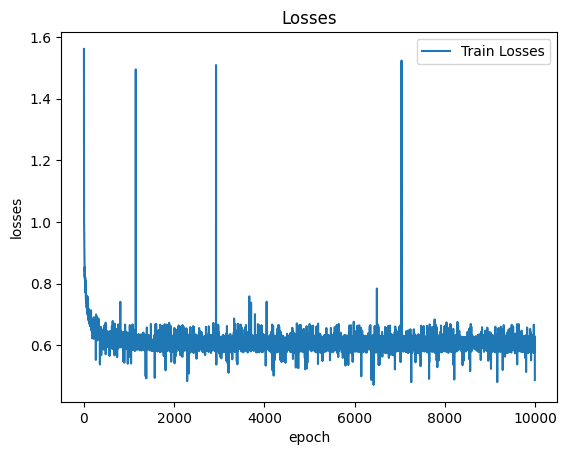

In [77]:
# Plotting the loss graph the graph of the best model
print("=" * 40)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("=" * 40)
best_model.plot()
plt.show()

In [78]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1-score
0         0.839024  0.836983  0.838002
1         0.674208  0.653509  0.663697
2         0.594737  0.642045  0.617486
3         0.858289  0.829457  0.843627
accuracy                      0.740349
macro     0.741565  0.740499  0.740703
weighted  0.743327  0.740349  0.741534


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       411
           1       0.67      0.65      0.66       456
           2       0.59      0.64      0.62       352
           3       0.86      0.83      0.84       387

    accuracy                           0.74      1606
   macro avg       0.74      0.74      0.74      1606
weighted avg       0.74      0.74      0.74      1606



In [ ]:
## The support in the Skearn's Classificatin Report shows that the test dataset has four category  \n The 0 category has 411 sample, 1 category has 456 sample, 2 category has 352 samples and category 3 has 387 sample.

In [96]:
import mlflow
import mlflow.sklearn

# Best model parameters
best_reg = "Ridge"
best_method = "minibatch"
alpha = 0.01  # choose the alpha you want
l = 0.1       # Ridge regularization parameter

# Set up model parameters
params = {
    "k": k,
    "n": X_train.shape[1],
    "method": best_method,
    "l": l,
    "alpha": alpha,
    "max_iter": 10000
}

# Start MLflow run
with mlflow.start_run(run_name=f"{best_reg}_{best_method}"):
    # Initialize and train model
    model_class = str_to_class(best_reg)
    model = model_class(**params)
    model.fit(X_train, Y_train_encoded)
    
    # Predictions
    yhat = model.predict(X_test)
    
    # Log metrics
    accuracy = model.accuracy(y_test, yhat)
    mlflow.log_metric("accuracy", accuracy)
    
    for c in range(k):
        mlflow.log_metric(f"class_{c}_f1", model.f1_score(y_test, yhat, c))
        mlflow.log_metric(f"class_{c}_precision", model.precision(y_test, yhat, c))
        mlflow.log_metric(f"class_{c}_recall", model.recall(y_test, yhat, c))
    
    # Log final training loss
    final_train_loss = model.losses[-1]
    mlflow.log_metric("final_train_loss", final_train_loss)
    print(f"Final Training Loss: {final_train_loss}")
    
    # Log the model artifact
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    print("✅ Best model logged successfully!")


Loss at iteration 0 1.7049001023739871
Loss at iteration 500 1.5076059239450583
Loss at iteration 1000 0.870045529322661
Loss at iteration 1500 0.9917480894238087
Loss at iteration 2000 1.3568407810481211
Loss at iteration 2500 1.6047692788671362
Loss at iteration 3000 1.909866797886232
Loss at iteration 3500 1.3544963982529752
Loss at iteration 4000 1.52299403742608
Loss at iteration 4500 1.8232508514973105
Loss at iteration 5000 0.8272802658430503
Loss at iteration 5500 1.243267364946
Loss at iteration 6000 1.6027370413196458
Loss at iteration 6500 1.2241072001385964
Loss at iteration 7000 1.1305337191916807
Loss at iteration 7500 1.6953606073088614
Loss at iteration 8000 0.9233273676828667
Loss at iteration 8500 0.8118639640142531
Loss at iteration 9000 0.8969774905156083
Loss at iteration 9500 1.7726793729885275
time taken: 19.06397318840027


2025/10/05 16:09:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.5538740687694854


2025/10/05 16:09:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


✅ Best model logged successfully!
🏃 View run Ridge_minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/0d1c41d013dd434bad4ec16764c151ef
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293


In [107]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Best model parameters
best_reg = "Ridge"
best_method = "minibatch"
alpha = 0.01  # choose the alpha you want
l = 0.1       # Ridge regularization parameter

# Set up model parameters
params = {
    "k": k,
    "n": X_train.shape[1],
    "method": best_method,
    "l": l,
    "alpha": alpha,
    "max_iter": 10000
}

with mlflow.start_run(run_name=f"{best_reg}_{best_method}") as run:
    # Initialize and train model
    model_class = str_to_class(best_reg)
    model = model_class(**params)
    model.fit(X_train, Y_train_encoded)

    # Predictions
    yhat = model.predict(X_test)

    # Log metrics
    accuracy = model.accuracy(y_test, yhat)
    mlflow.log_metric("accuracy", accuracy)

    for c in range(k):
        mlflow.log_metric(f"class_{c}_f1", model.f1_score(y_test, yhat, c))
        mlflow.log_metric(f"class_{c}_precision", model.precision(y_test, yhat, c))
        mlflow.log_metric(f"class_{c}_recall", model.recall(y_test, yhat, c))

    # Log final training loss
    final_train_loss = model.losses[-1]
    mlflow.log_metric("final_train_loss", final_train_loss)
    print(f"Final Training Loss: {final_train_loss}")

    # ✅ Log the model artifact properly
    signature = infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        signature=signature,
        input_example=X_train[:5],  # Optional: helps artifact preview
        registered_model_name=f"{best_reg}_{best_method}"
    )

    # ✅ (Optional) Log other files as artifacts
    import joblib
    joblib.dump(model, "ridge_model.pkl")
    mlflow.log_artifact("ridge_model.pkl")

    print("✅ Model and artifacts logged successfully!")

print(f"Run completed. View in MLflow UI: {mlflow.get_tracking_uri()}")


Loss at iteration 0 1.430690648935651
Loss at iteration 500 1.3312006459511527
Loss at iteration 1000 1.599776071050023
Loss at iteration 1500 1.191154538123742
Loss at iteration 2000 0.8296597316775746
Loss at iteration 2500 1.5044447311890978
Loss at iteration 3000 0.9906249141753167
Loss at iteration 3500 1.8771877374195818
Loss at iteration 4000 1.0959602444456729
Loss at iteration 4500 1.7707221375599784
Loss at iteration 5000 1.538181073643587
Loss at iteration 5500 0.7829514555483384
Loss at iteration 6000 1.4609843461159473
Loss at iteration 6500 1.9814265342519837
Loss at iteration 7000 1.552030139869927
Loss at iteration 7500 0.8451879528135628
Loss at iteration 8000 1.6387868343244683
Loss at iteration 8500 1.5783898606331175
Loss at iteration 9000 2.1835902104123526
Loss at iteration 9500 1.8318138589780661
time taken: 19.324830532073975


2025/10/05 17:26:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.6549571458996348


2025/10/05 17:26:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Successfully registered model 'Ridge_minibatch'.
2025/10/05 17:26:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge_minibatch, version 1
Created version '1' of model 'Ridge_minibatch'.


✅ Model and artifacts logged successfully!
🏃 View run Ridge_minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293/runs/f13a986f330f404a98d482eba07628b5
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/390424609280797293
Run completed. View in MLflow UI: https://mlflow.ml.brain.cs.ait.ac.th/


### Testing the model importing from MLFlow

In [ ]:

import pickle

# paths of all components for car price predictions
brand_label_encoder_path = 'Model/car_brand_encoder.model'
scaler_path = 'Model/car-scaling.model'
fuel_label_encoder_path = 'Model/car_fuel_encoder.model'
pickle.dump(brand_ohe, open(brand_label_encoder_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
pickle.dump(fuel_encoder, open(fuel_label_encoder_path, 'wb'))


In [80]:
print(model)

### Registration model with the run id and and model name

In [87]:
# To veiw all the metrics
from mlflow.tracking import MlflowClient

# client = MlflowClient()
# runs = client.search_runs(experiment_ids=[469864923438442098])

# for r in runs:
#     print(f"Run ID: {r.info.run_id}")
#     print("Metrics:", r.data.metrics)

In [108]:
import mlflow
from mlflow.tracking import MlflowClient

# MLflow client
client = MlflowClient()

# Your model name in the registry
model_name = "st125989-a3-model"

# Correct run ID (from your screenshot)
best_run_id = "f13a986f330f404a98d482eba07628b5"
model_uri = f"runs:/{best_run_id}/model"  # 'model' is the artifact_path you used in log_model

# Register the new model (creates a new version)
registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
print(f"Registered new model '{model_name}' with version: {registered_model.version}")


Registered model 'st125989-a3-model' already exists. Creating a new version of this model...
2025/10/05 17:27:44 WARNING mlflow.tracking._model_registry.fluent: Run with id f13a986f330f404a98d482eba07628b5 has no artifacts at artifact path 'model', registering model based on models:/m-bb7cb61fef7245bb92378f633a4e4cae instead
2025/10/05 17:27:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125989-a3-model, version 2
Created version '2' of model 'st125989-a3-model'.


Registered new model 'st125989-a3-model' with version: 2


In [112]:
# Registering the model with best run id
import mlflow
from mlflow.tracking import MlflowClient

# MLflow client
client = MlflowClient()

# Your new model name
model_name = "st125989-a3-model"

# Best run info
best_run_id = "f13a986f330f404a98d482eba07628b5"
model_uri = f"runs:/{best_run_id}/model"  # Assuming your model artifact is saved under "model"

# Check if the model already exists and delete if needed
try:
    client.delete_registered_model(name=model_name)
    print(f"Deleted existing registered model '{model_name}'")
except Exception as e:
    print(f"No existing model to delete or error: {e}")

# Register the new model
registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
print(f"Registered new model '{model_name}' with version: {registered_model.version}")

Deleted existing registered model 'st125989-a3-model'


Successfully registered model 'st125989-a3-model'.
2025/10/05 17:30:10 WARNING mlflow.tracking._model_registry.fluent: Run with id f13a986f330f404a98d482eba07628b5 has no artifacts at artifact path 'model', registering model based on models:/m-bb7cb61fef7245bb92378f633a4e4cae instead
2025/10/05 17:30:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125989-a3-model, version 1
Created version '1' of model 'st125989-a3-model'.


Registered new model 'st125989-a3-model' with version: 1


In [113]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
for mv in client.get_latest_versions("st125989-a3-model"):
    print(f"Version: {mv.version}, Stage: {mv.current_stage}")

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\1718720.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  for mv in client.get_latest_versions("st125989-a3-model"):


Version: 1, Stage: None


In [114]:
# Model promoted to Production!
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Promote version 1 to Production
client.transition_model_version_stage(
    name="st125989-a3-model",
    version=2,
    stage="Production",
    archive_existing_versions=True  # optional: archive any other Production version
)

print("Model promoted to Production!")

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\2985795493.py:7: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


RestException: RESOURCE_DOES_NOT_EXIST: Model Version (name=st125989-a3-model, version=2) not found

In [115]:
## Loading the model from model registry
run_id = "f13a986f330f404a98d482eba07628b5"
model = mlflow.pyfunc.load_model(f"runs:/{best_run_id}/model")

In [89]:
# import mlflow

# run_id = "671aac8734d64f77b16755dee5182a4f"
# client = mlflow.tracking.MlflowClient()

# # List all artifacts in the run
# artifacts = client.list_artifacts(run_id)
# for a in artifacts:
#     print(a.path)


model


In [90]:
# # Loading directly from a Run
# best_run_id = "671aac8734d64f77b16755dee5182a4f"
# model_uri = f"runs:/{best_run_id}/model"
# model = mlflow.pyfunc.load_model(model_uri)

In [116]:
# predict X_test based on the loaded model
import pandas as pd
precited_selling_price= model.predict(pd.DataFrame(X_test))
precited_selling_price[:10]

array([0, 3, 0, 1, 2, 0, 1, 2, 0, 2], dtype=int64)

In [117]:
# The actual values of y
y_test[:10]

array([0, 3, 1, 2, 2, 0, 1, 2, 0, 1], dtype=int64)

In [118]:
# Create a new dataframe we are going to perform inference with 
sample_df = pd.DataFrame([[107, 2017,100, 0, 'BMW']],
                         columns=['max_power', 'year','mileage', 'fuel', 'brand'])
sample_df

,max_power,year,mileage,fuel,brand
0,107,2017,100,0,BMW


In [119]:
# Encode and scale each feature
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,mileage,fuel,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,107,2017,100,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Find the required output class of the input
output = model.predict(sample_df)
output

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\3691783347.py:120: RuntimeWarning: overflow encountered in exp
  return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_9300\3691783347.py:120: RuntimeWarning: invalid value encountered in divide
  return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)


array([2], dtype=int64)